# **Predição de Sobrevivência de Pacientes com Cirrose**

**[Base de Dados proveniente do Kaggle](https://www.kaggle.com/datasets/joebeachcapital/cirrhosis-patient-survival-prediction)**

## **Objetivo**

**Investigar o efeito do tratamento utilizando a droga D-penicillamine e como os parâmetros que temos disponíveis afetam a expectativa de vida do paciente**

## **Sobre o Dataset**

**Essa base de dados contém dados de pacientes da [Mayo Clinic](https://www.mayoclinic.org/) que participaram de um estudo entre os anos de 1974 e 1984 para análisar a efetividade da droga D-penicillamine no tratamento de pacientes com Cirrose Hepática**
* **Tamanho da Amostra**: Inicialmente haviam 424 pacientes, porém somente 312 pacientes optaram por participarem do teste, foi feito o acompanhamento dos 112 restantes dos quais 6 rapidamente ficaram irrastreáveis. (para essa análise será utilizado a informação dos 312 pacientes que optaram por participar do teste)
* A base consiste em 17 parâmetros clínicos e o status do paciente (0 = Morto, 1 = Censurado, 2 = Censurado por transplante de fígado)

### **Tabela de Variáveis**

|Variable Name|Role|Type|Demographic|Description|Units|Missing Values|
|-------------|----|----|-----------|-----------|-----|--------------|
|ID|ID|Integer||unique identifier||no|
|N_Days|Other|Integer||number of days between registration and the earlier of death, transplantation, or study analysis time in July 1986||no|
|Status|Target|Categorical||status of the patient C (censored), CL (censored due to liver tx), or D (death)||no|
|Drug|Feature|Categorical||type of drug D-penicillamine or placebo||yes|
|Age|Feature|Integer|Age|age|days|no|
|Sex|Feature|Categorical|Sex|M (male) or F (Female)||no|
|Ascites|Feature|Categorical||presence of ascites N (No) or Y (Yes)||yes|
|Hepatomegaly|Feature|Categorical||presence of hepatomegaly N (No) or Y (Yes)||yes|
|Spiders|Feature|Categorical||presence of spiders N (No) or Y (Yes)||yes|
|Edema|Feature|Categorical||presence of edema N (no edema and no diuretic therapy for edema), S (edema present without diuretics, or edema resolved by diuretics), or Y (edema despite diuretic therapy)||no|
|Bilirubin|Feature|Constinuos||serum bilirubin|mg/dl|no|
|Cholesterol|Feature|Integer||serum cholesterol|mg/dl|yes|
|Albumin|Feature|Continuous||albumin|gm/dl|no|
|Copper|Feature|Integer||urine copper|ug/day|yes|
|Alk_Phos|Feature|Continuous||alkaline phosphatase|U/liter|yes|
|SGOT|Feature|Continuous||SGOT|U/ml|yes|
|Tryglicerides|Feature|Integer||tryglicerides||yes|
|Platelets|Feature|Integer||platelets per cubic|ml/1000|yes|
|Prothrombin|Feature|Continuous||prothrombin time|s|yes|
|Stage|Feature|Categorical||histologic stage of disease (1,2,3 or 4)||yes|

## **Pré-Processamento de dados**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

In [2]:
dataset = pd.read_csv('cirrhosis.csv')
dataset.dtypes

ID                 int64
N_Days             int64
Status            object
Drug              object
Age                int64
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage            float64
dtype: object

In [3]:
# Remoção do Campo ID pois o mesmo não é útil para a análise
dataset = dataset.drop(columns=['ID'])

# Remoção dos Pacientes que não fizeram parte do teste
dataset = dataset[dataset.Drug.notna()]

# Remoção dos Pacientes que foram censurados devido a transplante de fígado
dataset = dataset[dataset.Status.isin(['C','D'])]

# Divisão da idade por 365 (convertendo idade de dias para Anos)
dataset.Age = np.round(dataset.Age/365,0)

In [4]:
# Como sabemos que alguns campos tem valores em branco (mesmo com os pacientes que participaram do teste) temos 2 opções: 
# 1 - Remover todos os registros com valores em branco
# 2 - Preencher os valores em branco (preenchimento com média, último valor ou primeiro valor)
# Para essa análise vou optar pela remoção dos registros com valores em branco

quantidade_antes = len(dataset)
print(f'Quantidade antes da remoção: {quantidade_antes}')
dataset = dataset.dropna()
quantidade_depois = len(dataset)
print(f'Qauntidade após remoção: {quantidade_depois}')
print(f'Porcentagem de registros removidos: {100-(quantidade_depois/quantidade_antes)*100:.2f}%')

Quantidade antes da remoção: 293
Qauntidade após remoção: 258
Porcentagem de registros removidos: 11.95%


In [5]:
max(dataset.N_Days)

4556

In [6]:
dataset.Status.value_counts()

Status
C    147
D    111
Name: count, dtype: int64

In [7]:
dataset.Drug.unique()

array(['D-penicillamine', 'Placebo'], dtype=object)

In [8]:
dataset.Edema.value_counts()

Edema
N    218
S     23
Y     17
Name: count, dtype: int64

In [9]:
dataset.dtypes

N_Days             int64
Status            object
Drug              object
Age              float64
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage            float64
dtype: object

In [10]:
dataset_tratado = dataset.copy()

dataset_tratado = pd.get_dummies(dataset_tratado, drop_first=True)
dataset_tratado.rename(columns={'Status_D': 'dead', 'Drug_Placebo': 'placebo', 'Sex_M': 'male', 'Ascites_Y':'ascites', 'Hepatomegaly_Y':'hepatomegaly', 'Spiders_Y':'spiders', 'Edema_S':'edema_s', 'Edema_Y':'edema_y'}, inplace=True)
name_to_lower = ['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage']
lowered = [x.lower() for x in name_to_lower]
name_changes = {}
for after, before in zip (name_to_lower, lowered):
    name_changes[after] = before
dataset_tratado.rename(columns=name_changes, inplace=True)

dataset_tratado.head()

,n_days,age,bilirubin,cholesterol,albumin,copper,alk_phos,sgot,tryglicerides,platelets,prothrombin,stage,dead,placebo,male,ascites,hepatomegaly,spiders,edema_s,edema_y
0,400,59.0,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0,True,False,False,True,True,True,False,True
1,4500,56.0,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0,False,False,False,False,True,True,False,False
2,1012,70.0,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0,True,False,True,False,False,False,True,False
3,1925,55.0,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0,True,False,False,False,True,True,True,False
6,1832,56.0,1.0,322.0,4.09,52.0,824.0,60.45,213.0,204.0,9.7,3.0,False,True,False,False,True,False,False,False


In [11]:
col_change_type = ['age', 'stage']
type_change = [int, 'category']

for col, type in zip(col_change_type, type_change):
    dataset_tratado[col] = dataset_tratado[col].astype(type)

dataset_tratado.dtypes

n_days              int64
age                 int64
bilirubin         float64
cholesterol       float64
albumin           float64
copper            float64
alk_phos          float64
sgot              float64
tryglicerides     float64
platelets         float64
prothrombin       float64
stage            category
dead                 bool
placebo              bool
male                 bool
ascites              bool
hepatomegaly         bool
spiders              bool
edema_s              bool
edema_y              bool
dtype: object

## **Análise exploratória**

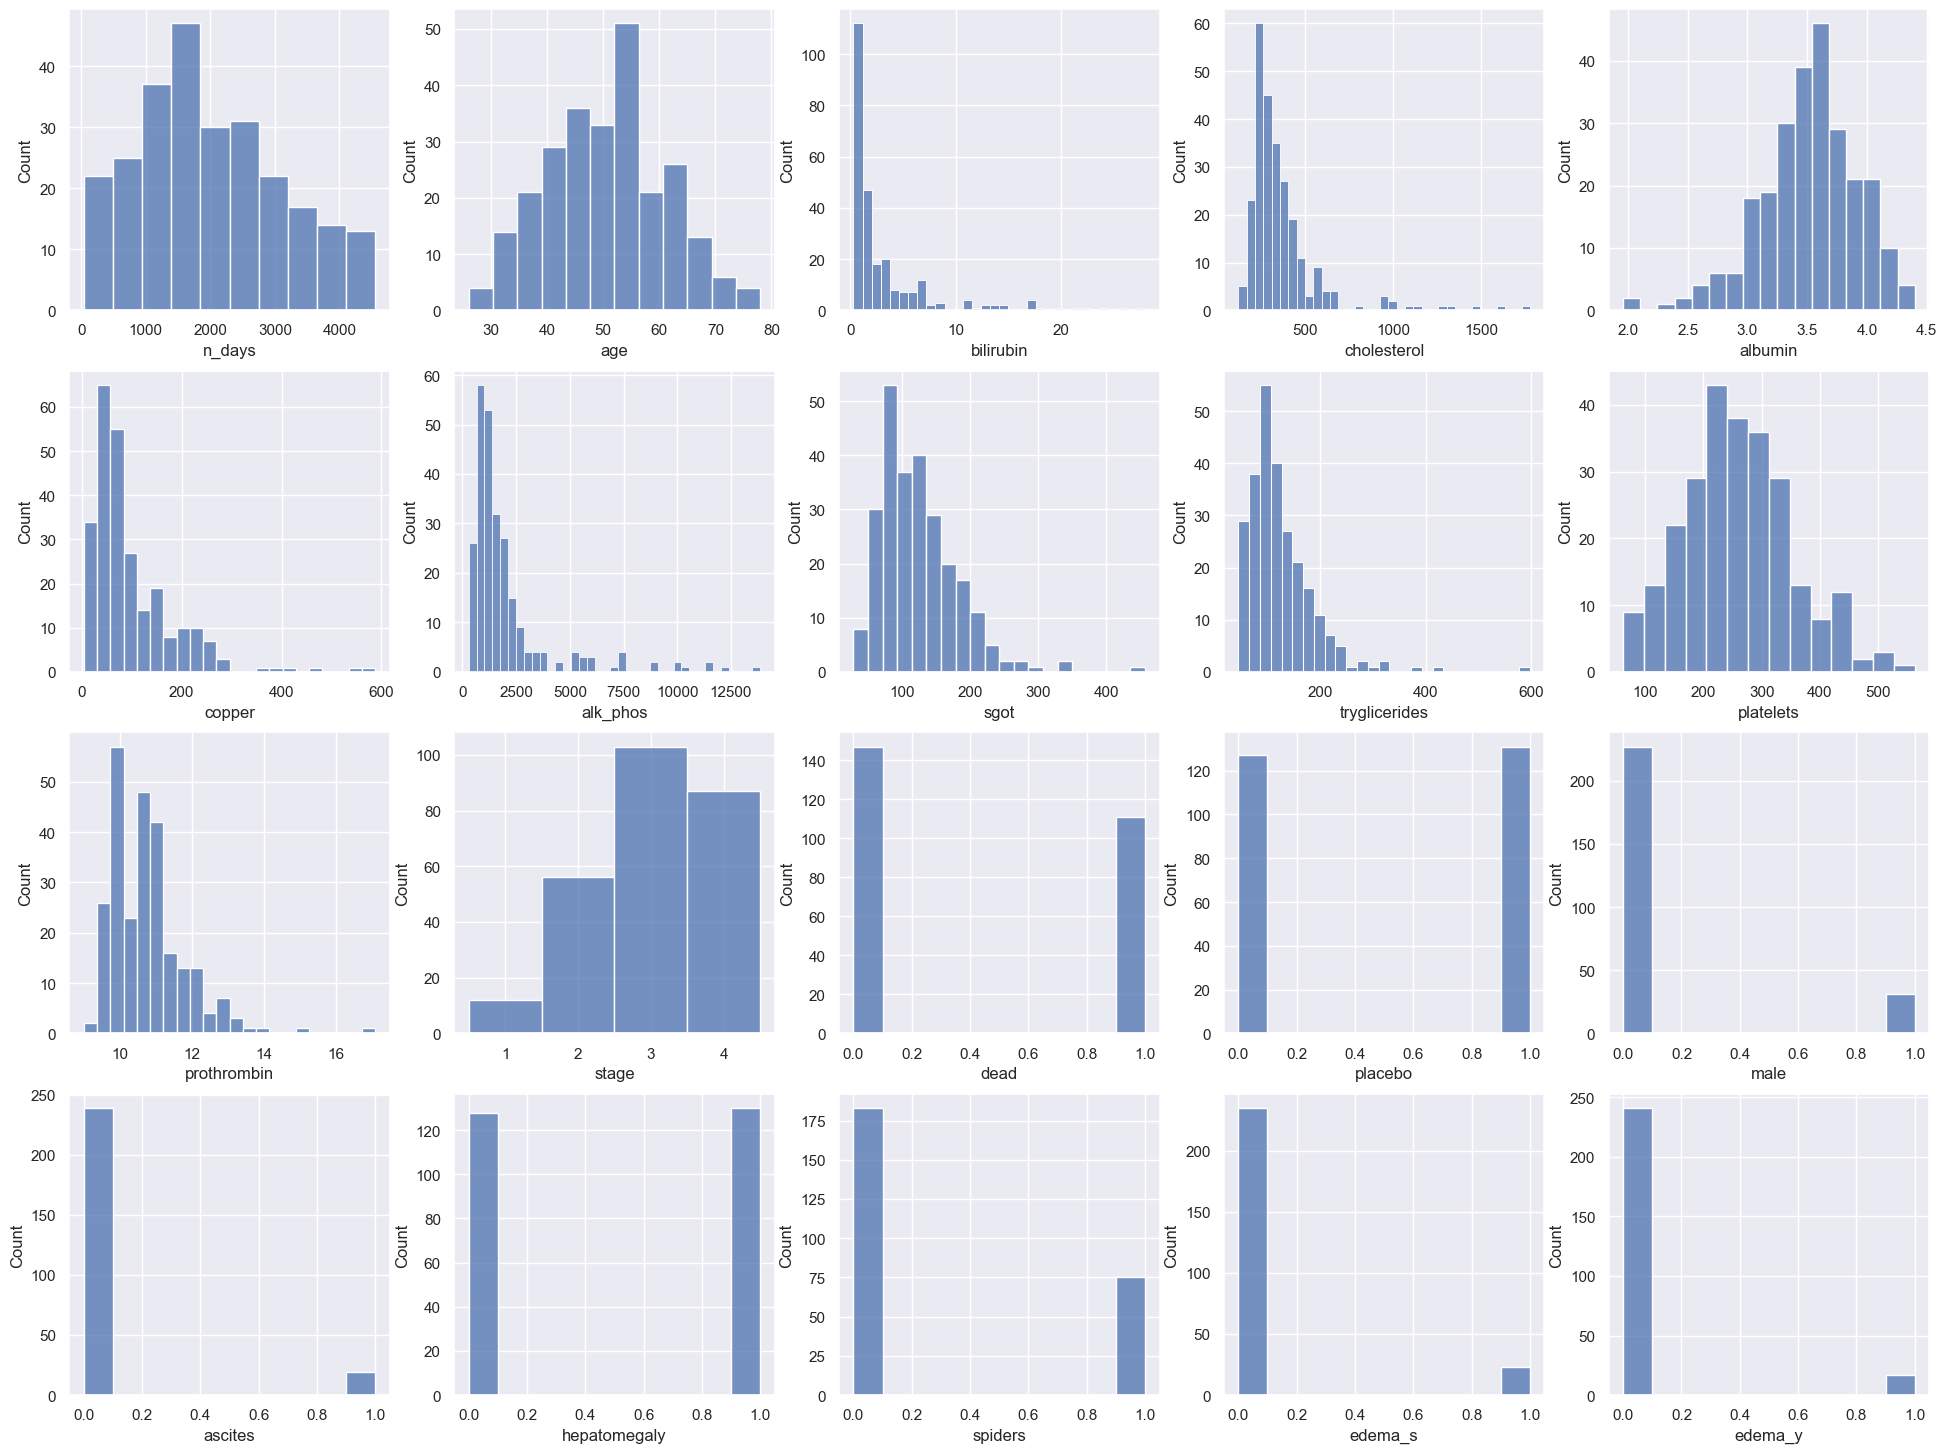

In [12]:
fig,ax = plt.subplots(4,5)
fig.set_figheight(18)
fig.set_figwidth(24)

linha = 0
coluna = 0
for i, column in enumerate(dataset_tratado.columns):
    if i>0 and i%5 == 0: 
        linha+=1
        coluna=0
    sns.histplot(data=dataset_tratado,x=column,ax=ax[linha,coluna])
    coluna+=1

plt.show()


* Podemos notar no histograma de N_Days uma assimetria positiva
* Temos um maior número de dados censurados (pessoas que deixaram o estudo ou que sobreviveram o período completo do mesmo) do que de mortes confirmadas
* Temos uma quantidade quase idêntica de pacientes fazendo o uso da droga e de placebo
* A maior parte dos pacientes possuí idades na faixa 40-60
* Temos uma predominância de mulheres participando do estudo
* A maioria dos pacientes não apresentaram Ascites ou Edema
* A quantidade de pacientes com e sem Hepatomegaly é quase idêntica
* Uma grande parte dos pacientes não possuí Spiders
* Tirando Albumin e Platelets a maioria dos parâmetros médicos possuí assimetria a direita

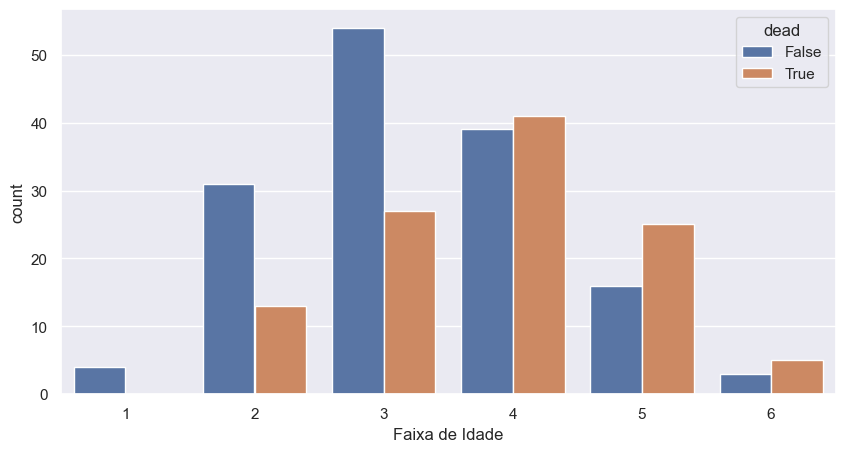

In [13]:
curiosidade = dataset_tratado[['age','dead']].copy()
curiosidade['FaixaIdade'] = 0
for idade in curiosidade.age.unique():
    if idade >= 20 and idade < 31:
        curiosidade.loc[curiosidade.age == idade, 'FaixaIdade'] = 1
    elif idade > 30 and idade < 41:
        curiosidade.loc[curiosidade.age == idade, 'FaixaIdade'] = 2
    elif idade > 40 and idade < 51:
        curiosidade.loc[curiosidade.age == idade, 'FaixaIdade'] = 3
    elif idade > 50 and idade < 61:
        curiosidade.loc[curiosidade.age == idade, 'FaixaIdade'] = 4
    elif idade > 60 and idade < 71:
        curiosidade.loc[curiosidade.age == idade, 'FaixaIdade'] = 5
    else:
        curiosidade.loc[curiosidade.age == idade, 'FaixaIdade'] = 6

plt.figure(figsize=(10,5))
sns.countplot(curiosidade, x='FaixaIdade', hue='dead')
plt.xlabel('Faixa de Idade')
plt.show()

**Olhando os dados ficou claro que seria difícil visualizar os dados utilizando-os do jeito que estavam, portanto eu separei eles em faixas para poder ver a proporção de mortos e censurados em cada faixa**

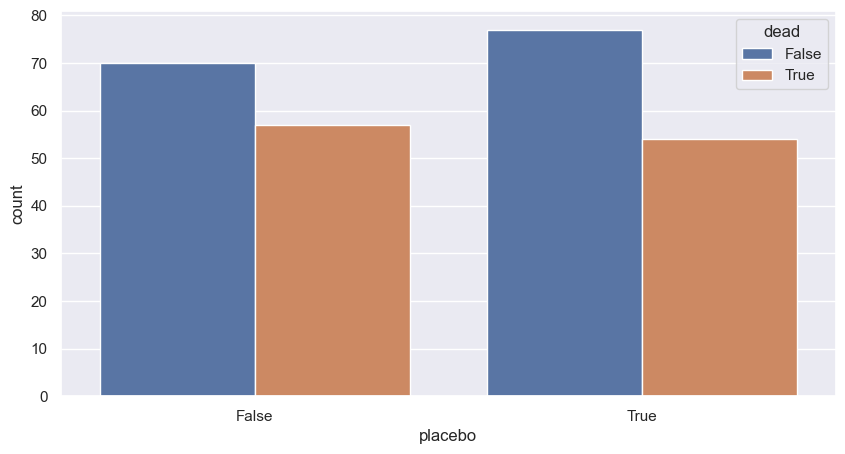

In [16]:
plt.figure(figsize=(10,5))
sns.countplot(dataset_tratado, x='placebo', hue='dead')
plt.show()

**Gráfico para a visualização de quantas pessoas de cada grupo são dados censurados ou mortos**

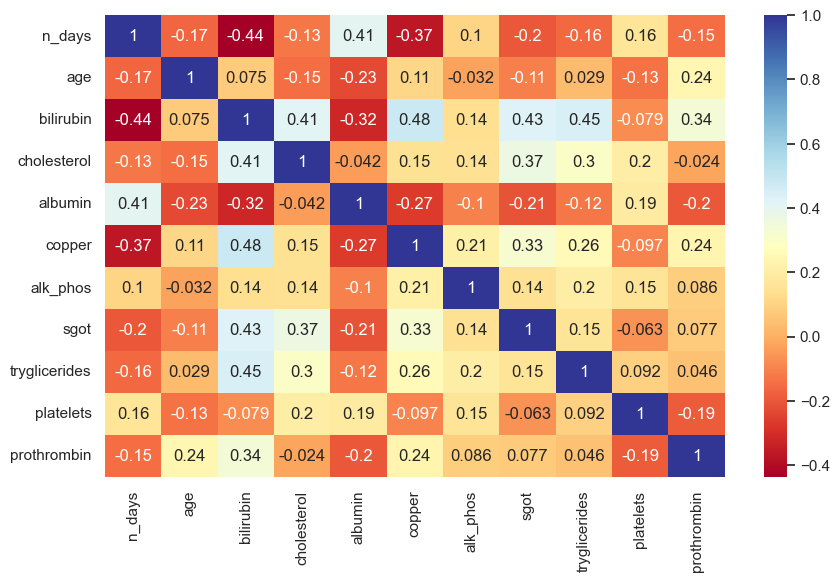

In [17]:
numerical = dataset_tratado.select_dtypes(include=[int, float])

plt.figure(figsize=(10,6))
sns.heatmap(dataset_tratado[numerical.columns].corr(), annot=True, cmap='RdYlBu')
plt.show()

**Como nenhuma das variáveis é fortemente correlacionada nós não precisamos em violar nenhuma suposição de correlação**

In [20]:
from lifelines import KaplanMeierFitter, NelsonAalenFitter
from lifelines.statistics import logrank_test
from scipy.stats import gaussian_kde

In [18]:
dataset_tratado.head()

,n_days,age,bilirubin,cholesterol,albumin,copper,alk_phos,sgot,tryglicerides,platelets,prothrombin,stage,dead,placebo,male,ascites,hepatomegaly,spiders,edema_s,edema_y
0,400,59,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0,True,False,False,True,True,True,False,True
1,4500,56,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0,False,False,False,False,True,True,False,False
2,1012,70,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0,True,False,True,False,False,False,True,False
3,1925,55,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0,True,False,False,False,True,True,True,False
6,1832,56,1.0,322.0,4.09,52.0,824.0,60.45,213.0,204.0,9.7,3.0,False,True,False,False,True,False,False,False


In [35]:
kmf = KaplanMeierFitter()
kmf.fit(durations=dataset_tratado.n_days, event_observed=dataset_tratado.dead)
survival_function = pd.DataFrame(kmf.survival_function_)

In [80]:
quantidade_vivos = []
quantidade_mortos = []
chance_morte = []
quantidade_registros = []
datas = dataset_tratado.n_days.sort_values().unique()
survival_table = pd.DataFrame(columns = ['n_days'], data = datas)

for i, x in enumerate(datas):
    quantidade_mortos.append(len(dataset_tratado[(dataset_tratado.n_days <= x) & (dataset_tratado.dead==1)]))
    quantidade_vivos.append(len(dataset_tratado) - quantidade_mortos[i])
    chance_morte.append(survival_function[survival_function.index == x].KM_estimate.values[0])
    quantidade_registros.append(len(dataset_tratado[dataset_tratado.n_days==x]))

survival_table['quantidade_vivos'] = quantidade_vivos
survival_table['quantidade_registros'] = quantidade_registros
survival_table['chance_sobrevivencia'] = chance_morte
survival_table['quantidade_mortos'] = quantidade_mortos

survival_table.head(10)

,n_days,quantidade_vivos,quantidade_registros,chance_sobrevivencia,quantidade_mortos
0,41,257,1,0.996124,1
1,51,256,1,0.992248,2
2,71,255,1,0.988372,3
3,77,254,1,0.984496,4
4,110,253,1,0.980620,5
5,131,252,1,0.976744,6
6,140,251,1,0.972868,7
7,179,250,1,0.968992,8
8,186,249,1,0.965116,9
9,191,248,1,0.961240,10


In [77]:
len(dataset_tratado[(dataset_tratado.n_days <= 1500) & (dataset_tratado.dead == 1)])

66

In [81]:
survival_table[survival_table.n_days <= 1500]

,n_days,quantidade_vivos,quantidade_registros,chance_sobrevivencia,quantidade_mortos
0,41,257,1,0.996124,1
1,51,256,1,0.992248,2
2,71,255,1,0.988372,3
3,77,254,1,0.984496,4
4,110,253,1,0.980620,5
...,...,...,...,...,...
90,1444,193,1,0.742511,65
91,1455,193,1,0.742511,65
92,1457,193,1,0.742511,65
93,1481,193,1,0.742511,65


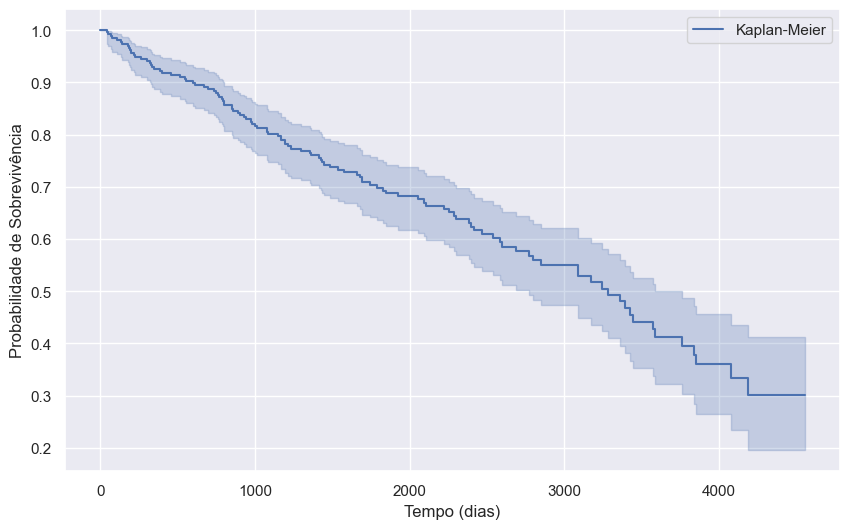

In [84]:
plt.figure(figsize=(10,6))
kmf.plot_survival_function(label='Kaplan-Meier')
plt.xlabel('Tempo (dias)')
plt.ylabel('Probabilidade de Sobrevivência')
plt.show()

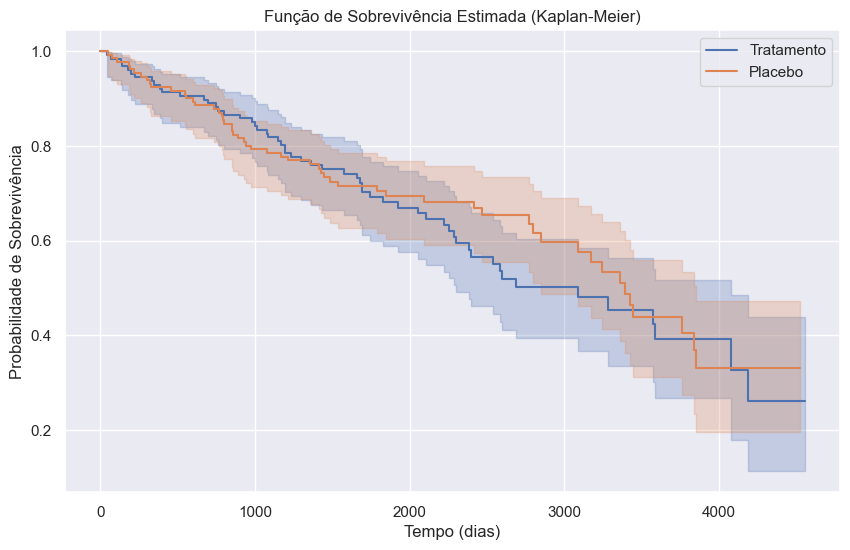

In [86]:
# Separação dos dados (em tratamento e placebo)
grupo_a = dataset_tratado[dataset_tratado.placebo == False].copy()
grupo_b = dataset_tratado[dataset_tratado.placebo == True].copy()

# Estimação de Kaplan-Meier
kmf_a = KaplanMeierFitter()
kmf_b = KaplanMeierFitter()

# Ajustar os modelos
kmf_a.fit(durations=grupo_a.n_days, event_observed=grupo_a.dead, label='Tratamento')
kmf_b.fit(durations=grupo_b.n_days, event_observed=grupo_b.dead, label='Placebo')

# Visualização
plt.figure(figsize=(10,6))

kmf_a.plot_survival_function(ci_show=True)
kmf_b.plot_survival_function(ci_show=True)
plt.title('Função de Sobrevivência Estimada (Kaplan-Meier)')
plt.xlabel('Tempo (dias)')
plt.ylabel('Probabilidade de Sobrevivência')
plt.grid(True)
plt.show()

**Aparentemente temos uma redução na expectativa de vida para os indivíduos que utilizaram o medicamento, iremos verificar mais a frente utilizando o teste de Log-Rank**<br>
**Podemos reparar também que o risco entre os dois grupos não é proporcional [(uma maneira fácil de identificar isso é observando se as curvas se cruzam)](https://www.theanalysisfactor.com/assumptions-cox-regression/)**

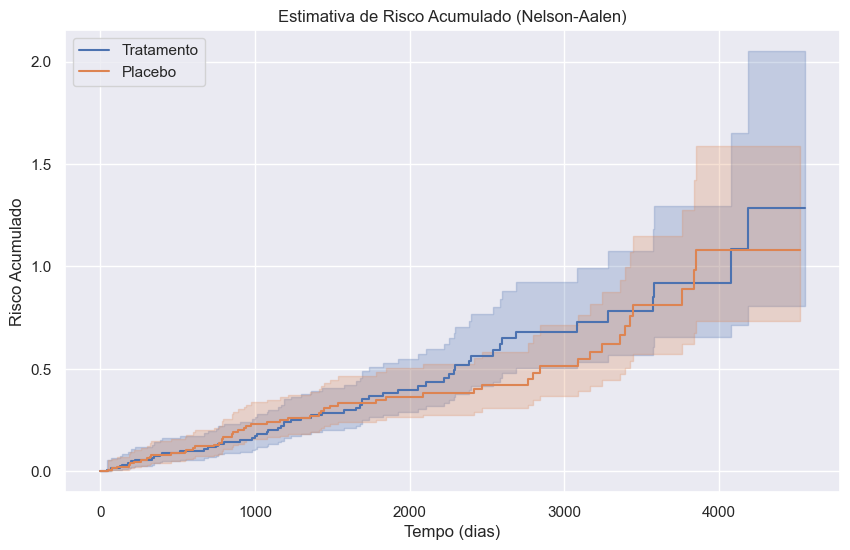

In [87]:
# Estimação de Kaplan-Meier
naf_a = NelsonAalenFitter()
naf_b = NelsonAalenFitter()

# Ajustar os modelos
naf_a.fit(durations=grupo_a.n_days, event_observed=grupo_a.dead, label='Tratamento')
naf_b.fit(durations=grupo_b.n_days, event_observed=grupo_b.dead, label='Placebo')

# Visualização
plt.figure(figsize=(10,6))
naf_a.plot_cumulative_hazard(ci_show=True)
naf_b.plot_cumulative_hazard(ci_show=True)
plt.title('Estimativa de Risco Acumulado (Nelson-Aalen)')
plt.xlabel('Tempo (dias)')
plt.ylabel('Risco Acumulado')
plt.grid(True)
plt.show()

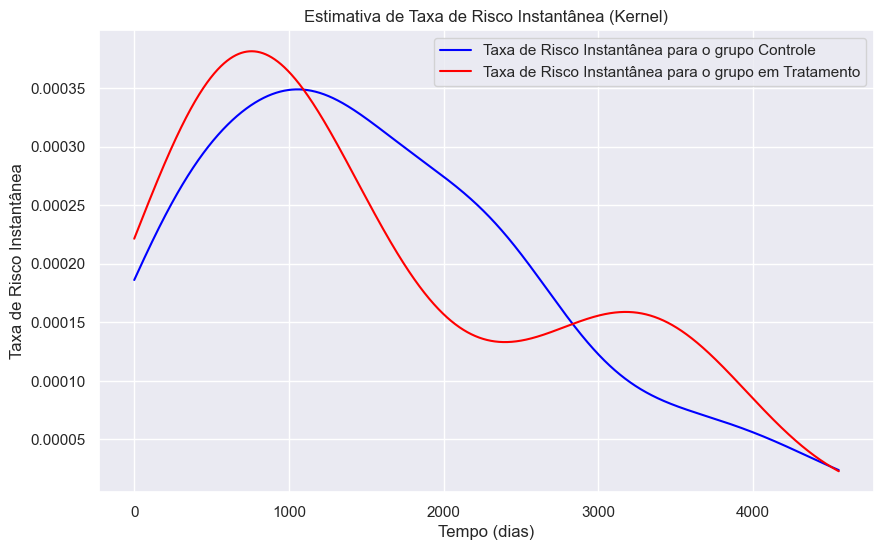

In [89]:
tempos_observados_a = grupo_a[grupo_a.dead == True]['n_days'].values
tempos_observados_b = grupo_b[grupo_b.dead == True]['n_days'].values

# Estimador de Kernel
kde_a = gaussian_kde(tempos_observados_a, bw_method='scott')
kde_b = gaussian_kde(tempos_observados_b, bw_method='scott')

time_grid = np.linspace(0, max(grupo_a['n_days']), 10000)

densidade_risco_a = kde_a(time_grid)
densidade_risco_b = kde_b(time_grid)

# Plotar a taxa de risco instantânea
plt.figure(figsize=(10, 6))
plt.plot(time_grid, densidade_risco_a, label="Taxa de Risco Instantânea para o grupo Controle", color="blue")
plt.plot(time_grid, densidade_risco_b, label="Taxa de Risco Instantânea para o grupo em Tratamento", color="red")
plt.title("Estimativa de Taxa de Risco Instantânea (Kernel)")
plt.xlabel('Tempo (dias)')
plt.ylabel("Taxa de Risco Instantânea")
plt.grid(True)
plt.legend()
plt.show()

In [90]:
# Teste de Log-Rank (para saber se a diferença entre pacientes tratados e não tratados é relevante)

logrank_result = logrank_test(
    grupo_a.n_days, grupo_b.n_days,
    event_observed_A=grupo_a.dead, event_observed_B=grupo_b.dead
)

# Exibindo o resultado do teste
print("Resultado do Teste de Log-Rank")
print(f"Estatística do teste: {logrank_result.test_statistic:.4f}")
print(f"Valor-p: {logrank_result.p_value:.4f}")

# Interpretação
if logrank_result.p_value < 0.05:
    print("Rejeitamos a hipótese nula: As curvas de sobrevivência são significativamente diferentes.")
else:
    print("Não rejeitamos a hipótese nula: Não há diferença significativa entre as curvas de sobrevivência.")

Resultado do Teste de Log-Rank
Estatística do teste: 0.3331
Valor-p: 0.5638
Não rejeitamos a hipótese nula: Não há diferença significativa entre as curvas de sobrevivência.


**Como o teste de log-rank deu que não existe diferença nas curvas a impressão que tivemos no começo do estudo estava incorreta**

## **Exploração dos dados utilizando modelos paramétricos**

### **Modelo Exponencial**

In [92]:
from lifelines import ExponentialFitter

In [95]:
exp_fitter = ExponentialFitter()
exp_fitter.fit(dataset_tratado.n_days, event_observed=dataset_tratado.dead)

<lifelines.ExponentialFitter:"Exponential_estimate", fitted with 258 total observations, 147 right-censored observations>

In [96]:
print('Parâmetros do modelo Exponencial')
print(exp_fitter.summary)
print('-----------------------------------------------------------------------------')
print(f'AIC: {exp_fitter.AIC_}\nBIC: {exp_fitter.BIC_}')

Parâmetros do modelo Exponencial
                coef    se(coef)  coef lower 95%  coef upper 95%  cmp to  \
lambda_  4676.045317  443.830606     3806.153314      5545.93732     0.0   

                 z             p   -log2(p)  
lambda_  10.535653  5.917108e-26  83.805238  
-----------------------------------------------------------------------------
AIC: 2099.9461661850964
BIC: 2103.499125770018


#### Gráfico da Função de Sobrevivência

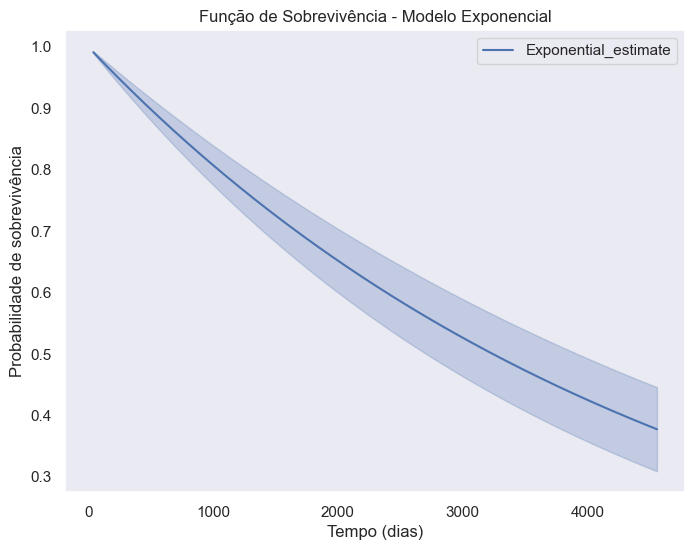

In [97]:
# Plotar a função de sobrevivência
plt.figure(figsize=(8, 6))
exp_fitter.plot_survival_function()
plt.title('Função de Sobrevivência - Modelo Exponencial')
plt.xlabel('Tempo (dias)')
plt.ylabel('Probabilidade de sobrevivência')
plt.grid()
plt.show()

#### Função de risco e gráfico


Função de risco: 4676.0453


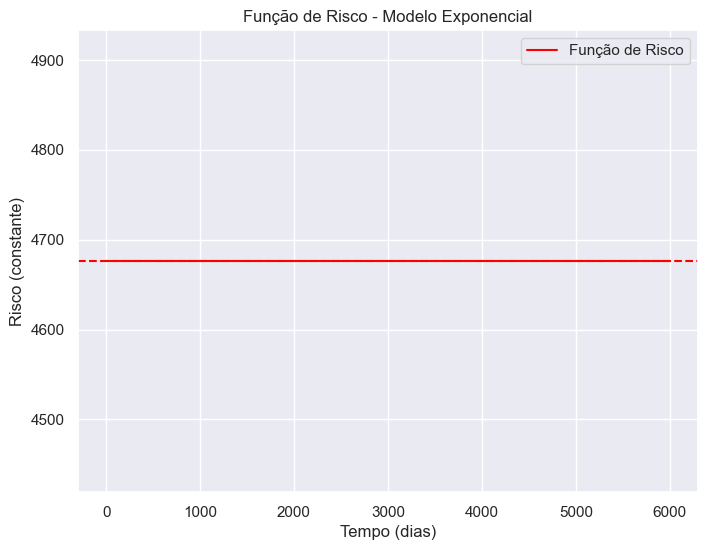

In [98]:
lambda_param = exp_fitter.lambda_
print(f'\nFunção de risco: {lambda_param:.4f}')

# Plotar a função de risco (constante para o modelo exponencial)
plt.figure(figsize=(8, 6))
tempos = np.linspace(0, 6000, 100)
risco = np.full_like(tempos, lambda_param)
plt.plot(tempos, risco, label='Função de Risco', color='red')
plt.title('Função de Risco - Modelo Exponencial')
plt.xlabel('Tempo (dias)')
plt.ylabel('Risco (constante)')
plt.axhline(y=lambda_param, color='red', linestyle='--')
plt.legend()
plt.show()

#### Adequação do Modelo

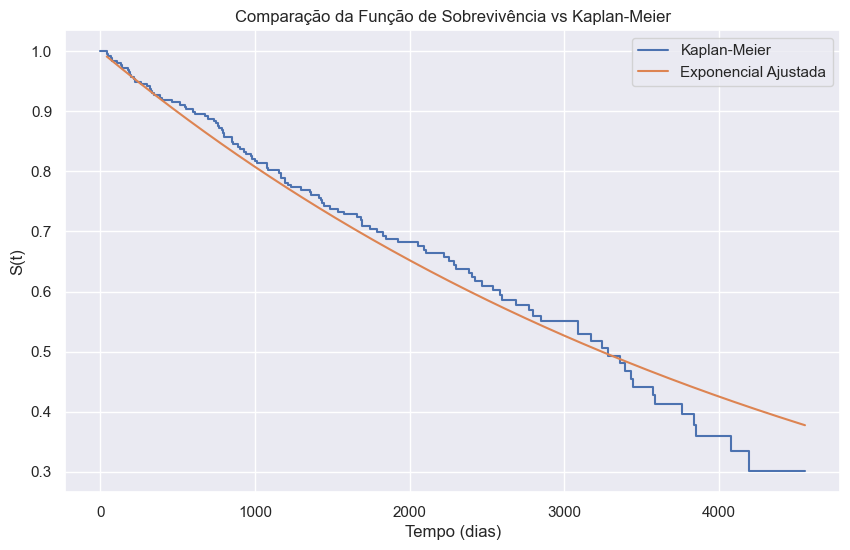

In [101]:
plt.figure(figsize=(10,6))
kmf.plot_survival_function(ci_show=False, label='Kaplan-Meier')
exp_fitter.plot_survival_function(ci_show=False, label='Exponencial Ajustada')
plt.title('Comparação da Função de Sobrevivência vs Kaplan-Meier')
plt.xlabel('Tempo (dias)')
plt.ylabel('S(t)')
plt.legend()
plt.show()

#### Gráfico do risco Acumulado

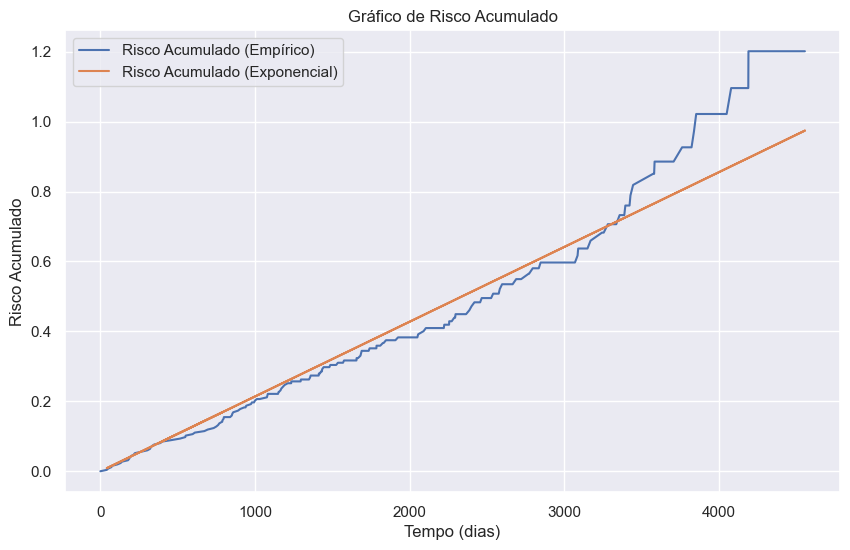

In [103]:
# Risco acumulado
plt.figure(figsize=(10, 6))
plt.plot(kmf.event_table.index, -np.log(kmf.survival_function_['KM_estimate']), label='Risco Acumulado (Empírico)')

# Foi necessário passar a coluna de N_Days para lista antes de utilizar na função de risco acumulado
plt.plot(dataset_tratado.n_days, exp_fitter.cumulative_hazard_at_times(dataset_tratado.n_days.to_list()), label='Risco Acumulado (Exponencial)')
plt.title('Gráfico de Risco Acumulado')
plt.xlabel('Tempo (dias)')
plt.ylabel('Risco Acumulado')
plt.legend()
plt.show()

#### Gráfico Log-Log para o modelo Exponencial

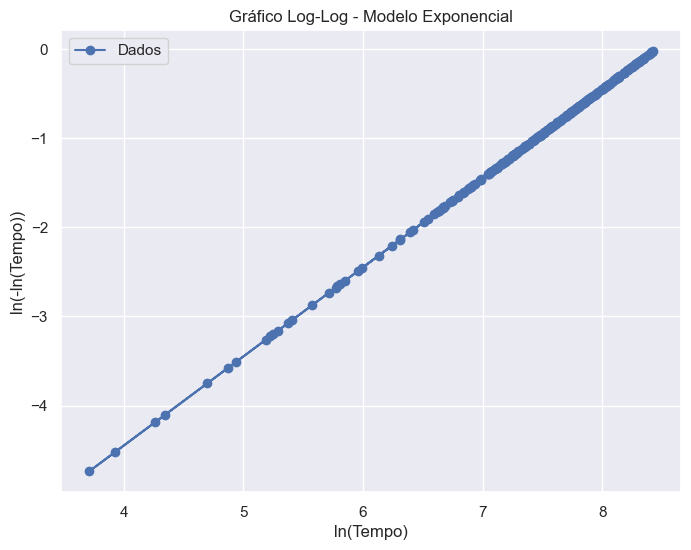

In [104]:
# Função de sobrevivência ajustada pelo modelo Exponencial
sobrevivencia = exp_fitter.survival_function_at_times(dataset.N_Days.to_list())

# Transformações para o gráfico log-log
log_tempo = np.log(dataset.N_Days.to_list())
log_neg_log_sobrevivencia = np.log(-np.log(sobrevivencia))

# Plotar gráfico log-log
plt.figure(figsize=(8,6))
plt.plot(log_tempo, log_neg_log_sobrevivencia, 'o-', label='Dados')
plt.title('Gráfico Log-Log - Modelo Exponencial')
plt.xlabel('ln(Tempo)')
plt.ylabel('ln(-ln(Tempo))')
plt.legend()
plt.show()

#### Tempo médio de sobrevivência para o modelo exponencial

In [ ]:
tempo_medio_sobrevivencia = 1/lambda_param
print(f'Tempo médio de sobrevivência: {tempo_medio_sobrevivencia} dias')

Tempo médio de sobrevivência: 0.00021385592571714329 dias


#### Previsão de Sobrevida para o Método Exponencial

In [113]:
tempo_predicao = np.array([450, 900, 2730, 4850, 7000, 15000])
predicoes = exp_fitter.survival_function_at_times(tempo_predicao)

print("\nProbabilidade de sobrevivência prevista para tempos específicos:")
for t, p in zip(tempo_predicao, predicoes):
    print(f"Tempo = {t} dias, Probabilidade de sobrevivência = {p:.2f}")


Probabilidade de sobrevivência prevista para tempos específicos:
Tempo = 450 dias, Probabilidade de sobrevivência = 0.91
Tempo = 900 dias, Probabilidade de sobrevivência = 0.82
Tempo = 2730 dias, Probabilidade de sobrevivência = 0.56
Tempo = 4850 dias, Probabilidade de sobrevivência = 0.35
Tempo = 7000 dias, Probabilidade de sobrevivência = 0.22
Tempo = 15000 dias, Probabilidade de sobrevivência = 0.04


**O modelo aparentemente é bom para prever a função de sobrevivência, porém é muito ruim prevendo o tempo médio de sobrevivência**

### **Modelo Log-Normal**

In [105]:
from lifelines import LogNormalFitter
from scipy.stats import probplot

#### Ajuste do modelo Log-Normal

In [106]:
lognormal_fitter = LogNormalFitter()
lognormal_fitter.fit(dataset_tratado.n_days.to_list(), event_observed=dataset_tratado.dead)

<lifelines.LogNormalFitter:"LogNormal_estimate", fitted with 258 total observations, 147 right-censored observations>

#### Parâmetros no Método Log-Normal

In [107]:
print('\nParâmetros do modelo Log-Normal:')
print(lognormal_fitter.summary)
print('---------------------------------------------------------------------------------')
print(f'AIC: {lognormal_fitter.AIC_}\nBIC: {lognormal_fitter.BIC_}')


Parâmetros do modelo Log-Normal:
            coef  se(coef)  coef lower 95%  coef upper 95%  cmp to          z  \
mu_     8.135949  0.121673        7.897475        8.374424     0.0  66.867418   
sigma_  1.453290  0.105862        1.245804        1.660777     1.0   4.281889   

               p   -log2(p)  
mu_     0.000000        inf  
sigma_  0.000019  15.719674  
---------------------------------------------------------------------------------
AIC: 2109.735754301262
BIC: 2116.8416734711054


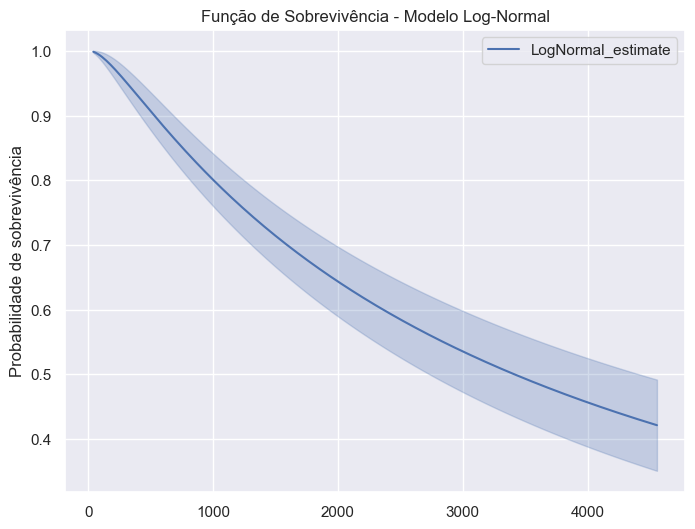

In [ ]:
# Plotar a função de sobrevivência
plt.figure(figsize=(8, 6))
lognormal_fitter.plot_survival_function()
plt.title('Função de Sobrevivência - Modelo Log-Normal')
plt.ylabel('Probabilidade de sobrevivência')
plt.show()

#### Função de risco

In [108]:
tempos_plot = np.linspace(0.1, max(dataset_tratado.n_days.to_list()), 100)
risco = lognormal_fitter.hazard_at_times(tempos_plot)

#### Gráfico da Função de Risco

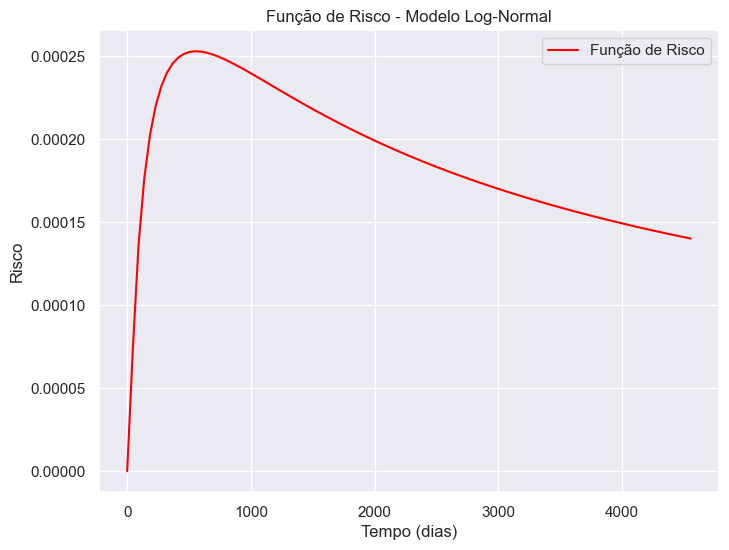

In [110]:
# Plotar a função de risco
plt.figure(figsize=(8, 6))
plt.plot(tempos_plot, risco, label='Função de Risco', color='red')
plt.title('Função de Risco - Modelo Log-Normal')
plt.xlabel('Tempo (dias)')
plt.ylabel('Risco')
plt.legend()
plt.show()

#### Tempo Médio Esperado de Sobrevivência

In [111]:
# Tempo médio de sobrevivência (estimado numericamente)
def tempo_medio_lognormal(mu, sigma):
    from scipy.stats import lognorm
    mean = lognorm.mean(s=sigma, scale=np.exp(mu))
    return mean

mu = lognormal_fitter.mu_  # Parâmetro de localização (mu)
sigma = lognormal_fitter.sigma_  # Parâmetro de escala (sigma)

tempo_medio_sobrevivencia = tempo_medio_lognormal(mu, sigma)
print(f"\nTempo médio de sobrevivência: {tempo_medio_sobrevivencia:.2f} dias")


Tempo médio de sobrevivência: 9818.03 dias


#### Previsão

In [114]:
# Previsões para tempos específicos
previsoes_sobrevivencia = lognormal_fitter.survival_function_at_times(tempo_predicao)

print("\nProbabilidade de sobrevivência para tempos específicos:")
for t, p in zip(tempo_predicao, previsoes_sobrevivencia):
    print(f"Tempo = {t} dias, Probabilidade de sobrevivência = {p:.2f}")



Probabilidade de sobrevivência para tempos específicos:
Tempo = 450 dias, Probabilidade de sobrevivência = 0.92
Tempo = 900 dias, Probabilidade de sobrevivência = 0.82
Tempo = 2730 dias, Probabilidade de sobrevivência = 0.56
Tempo = 4850 dias, Probabilidade de sobrevivência = 0.40
Tempo = 7000 dias, Probabilidade de sobrevivência = 0.31
Tempo = 15000 dias, Probabilidade de sobrevivência = 0.15


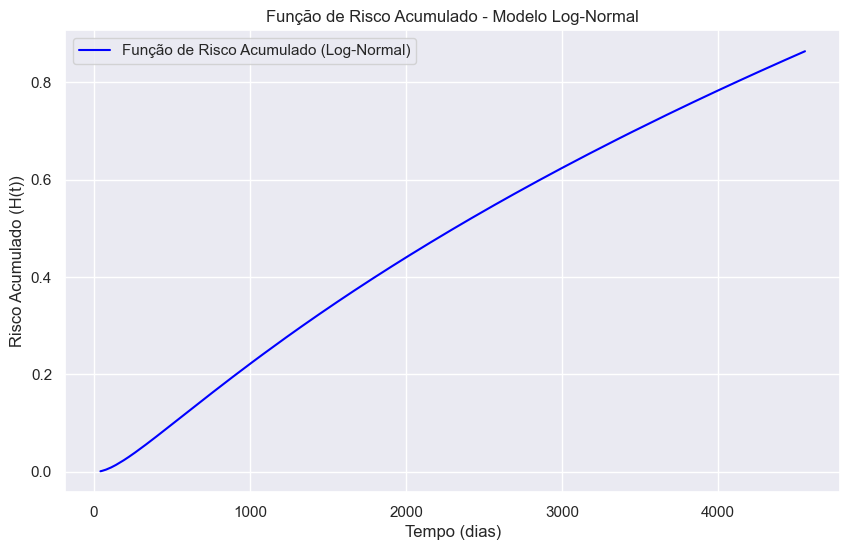

In [116]:
# Calcular risco acumulado
cumulative_hazard = lognormal_fitter.cumulative_hazard_at_times(dataset_tratado.n_days.sort_values().unique())

# Plotar o risco acumulado
plt.figure(figsize=(10, 6))
plt.plot(dataset_tratado.n_days.sort_values().unique(), cumulative_hazard, label='Função de Risco Acumulado (Log-Normal)', color='blue')
plt.title('Função de Risco Acumulado - Modelo Log-Normal')
plt.xlabel('Tempo (dias)')
plt.ylabel('Risco Acumulado (H(t))')
plt.legend()
plt.show()

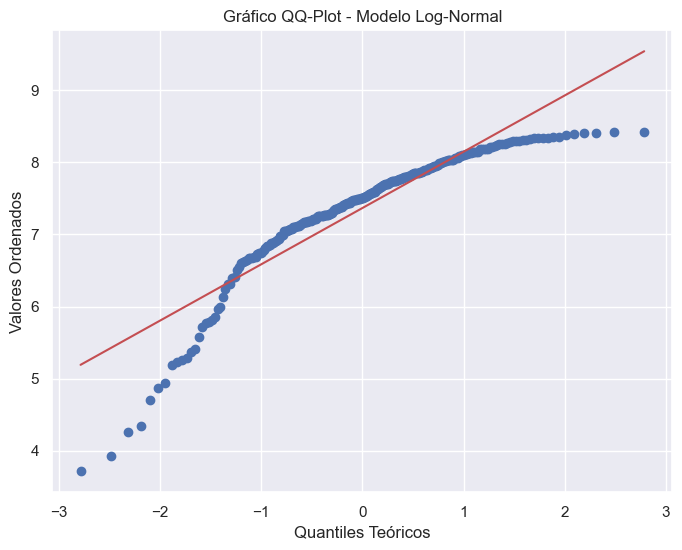

In [117]:
# Gráfico QQ-Plot para verificar ajuste ao modelo Log-Normal
log_tempos = np.log(dataset.N_Days)  # Log-transformação dos tempos
plt.figure(figsize=(8, 6))
probplot(log_tempos, dist="norm", plot=plt)
plt.title("Gráfico QQ-Plot - Modelo Log-Normal")
plt.xlabel('Quantiles Teóricos')
plt.ylabel('Valores Ordenados')
plt.show()

### **Modelo Weibull**

In [118]:
from lifelines import WeibullFitter

In [119]:
weibull_fitter = WeibullFitter()
weibull_fitter.fit(dataset_tratado.n_days.to_list(), event_observed=dataset_tratado.dead)

<lifelines.WeibullFitter:"Weibull_estimate", fitted with 258 total observations, 147 right-censored observations>

In [ ]:
weibull_fitter.summary

,coef,se(coef),coef lower 95%,coef upper 95%,cmp to,z,p,-log2(p)
lambda_,4313.432891,411.847258,3506.227098,5120.638684,1.0,10.470952,1.174557e-25,82.816086
rho_,1.139982,0.095090,0.953610,1.326354,1.0,1.472104,1.409928e-01,2.826307


#### **Função de Sobrevivência**

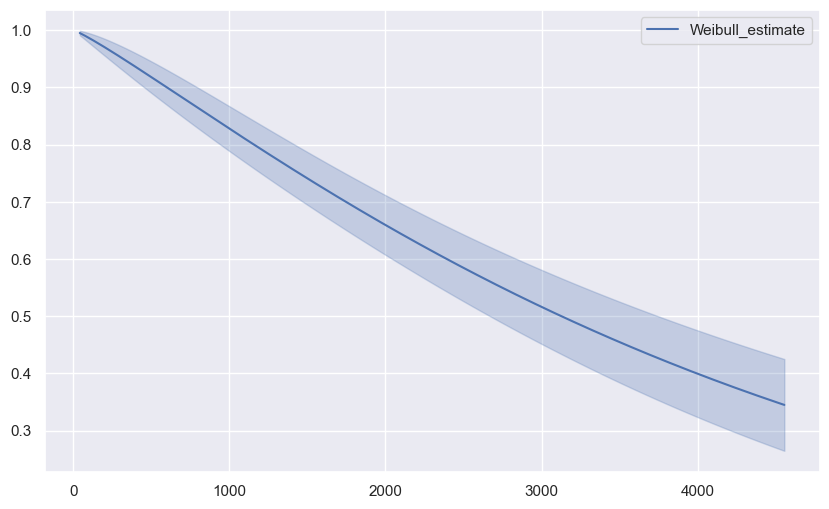

In [ ]:
plt.figure(figsize=(10,6))
weibull_fitter.plot_survival_function()
plt.show()

#### **Adequação do Modelo**

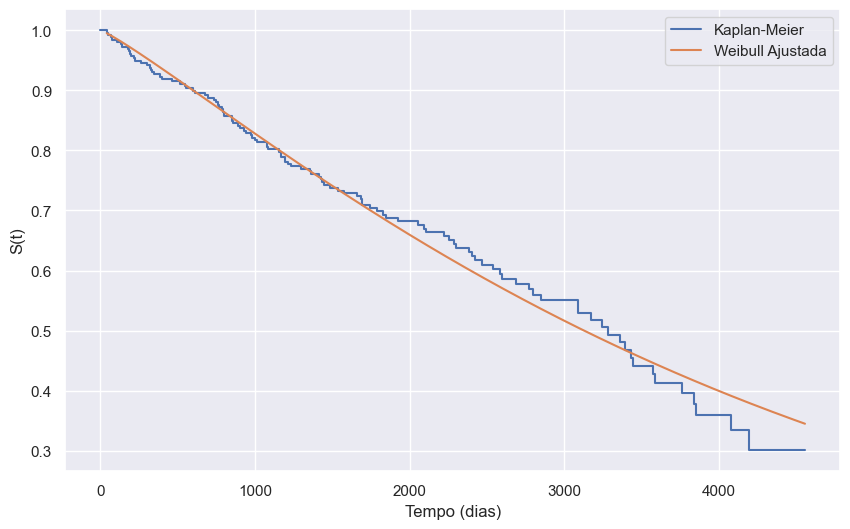

In [120]:
plt.figure(figsize=(10,6))
kmf.plot_survival_function(ci_show=False, label='Kaplan-Meier')
weibull_fitter.plot_survival_function(ci_show=False, label='Weibull Ajustada')
plt.xlabel('Tempo (dias)')
plt.ylabel('S(t)')
plt.show()

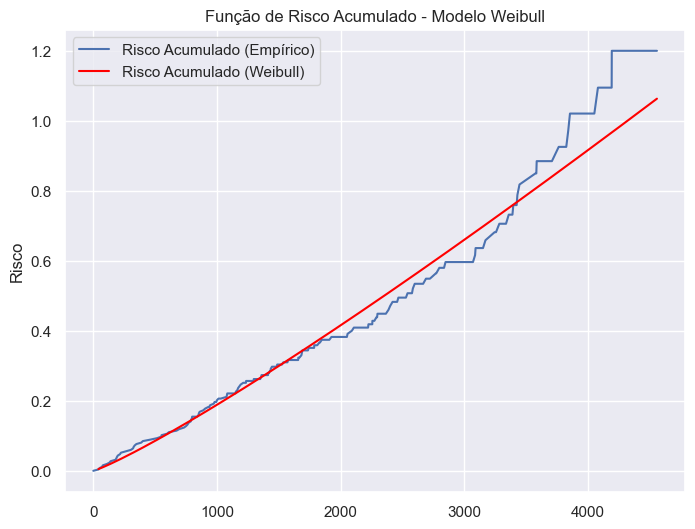

In [121]:
tempos_plot = dataset_tratado.n_days.sort_values().unique()
risco = weibull_fitter.cumulative_hazard_at_times(tempos_plot)

plt.figure(figsize=(8, 6))
plt.plot(kmf.event_table.index, -np.log(kmf.survival_function_['KM_estimate']), label='Risco Acumulado (Empírico)')
plt.plot(tempos_plot, risco, label='Risco Acumulado (Weibull)', color='red')
plt.title('Função de Risco Acumulado - Modelo Weibull')
plt.ylabel('Risco')

plt.legend()
plt.show()

In [ ]:
from math import e

print(f'e: {e}')
print(f'ln(e): {np.log(e)}')
print(f'log(e): {np.log10(e)}')

e: 2.718281828459045
ln(e): 1.0
log(e): 0.4342944819032518


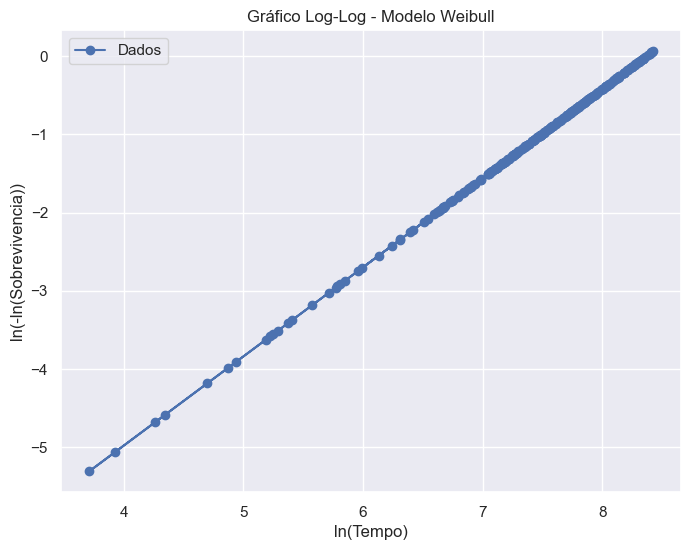

In [123]:
# Como provado acima a função np.log é na realidade ln e np.log10 representa o log de fato

# Função de sobrevivência ajustada pelo modelo Exponencial
sobrevivencia = weibull_fitter.survival_function_at_times(dataset_tratado.n_days.to_list())

# Transformações para o gráfico log-log
ln_tempo = np.log(dataset_tratado.n_days.to_list())
ln_neg_ln_sobrevivencia = np.log(-np.log(sobrevivencia))

# Plotar gráfico log-log
plt.figure(figsize=(8,6))
plt.plot(ln_tempo, ln_neg_ln_sobrevivencia, 'o-', label='Dados')
plt.title('Gráfico Log-Log - Modelo Weibull')
plt.xlabel('ln(Tempo)')
plt.ylabel('ln(-ln(Sobrevivencia))')
plt.legend()
plt.show()

In [ ]:
print('Parâmetros do modelo Weibull')
print(weibull_fitter.summary)
print('----------------------------------------------------------------------------')
print(f'AIC: {weibull_fitter.AIC_}\nBIC: {weibull_fitter.BIC_}')

Parâmetros do modelo Weibull
                coef    se(coef)  coef lower 95%  coef upper 95%  cmp to  \
lambda_  4313.432891  411.847258     3506.227098     5120.638684     1.0   
rho_        1.139982    0.095090        0.953610        1.326354     1.0   

                 z             p   -log2(p)  
lambda_  10.470952  1.174557e-25  82.816086  
rho_      1.472104  1.409928e-01   2.826307  
----------------------------------------------------------------------------
AIC: 2099.6130360170805
BIC: 2106.7189551869237


In [ ]:
from scipy.special import gamma

def tempo_medio_weibull(rho_, lambda_):
    return lambda_ * gamma (1 + 1/rho_)

print(f"Tempo médio de sobrevivência: {tempo_medio_weibull(weibull_fitter.rho_, weibull_fitter.lambda_)} dias")


Tempo médio de sobrevivência: 4115.707965216051 dias


#### Previsão de Sobrevida para Weibull

In [124]:
predicoes = weibull_fitter.survival_function_at_times(tempo_predicao)

print("\nProbabilidade de sobrevivência prevista para tempos específicos:")
for t, p in zip(tempo_predicao, predicoes):
    print(f"Tempo = {t} dias, Probabilidade de sobrevivência = {p:.2f}")


Probabilidade de sobrevivência prevista para tempos específicos:
Tempo = 450 dias, Probabilidade de sobrevivência = 0.93
Tempo = 900 dias, Probabilidade de sobrevivência = 0.85
Tempo = 2730 dias, Probabilidade de sobrevivência = 0.55
Tempo = 4850 dias, Probabilidade de sobrevivência = 0.32
Tempo = 7000 dias, Probabilidade de sobrevivência = 0.18
Tempo = 15000 dias, Probabilidade de sobrevivência = 0.02


**Realizando a análise dos modelos acima acredito que os dados se ajustam melhor ao modelo Weibull**

## **Teste do Modelo Weibull com adição de covariáveis**

In [131]:
from lifelines import WeibullAFTFitter

In [172]:
# dados_regressao = ['bilirubin', 'albumin', 'copper', 'placebo', 'hepatomegaly', 'spiders', 'edema_s', 'edema_y', 'age', 'dead', 'n_days']
dados_regressao = ['albumin', 'placebo', 'dead', 'n_days']
dados_regressao = dataset_tratado[dados_regressao].copy()

In [173]:
# Ajuste do modelo AFT Weibull
aft_model = WeibullAFTFitter()
aft_model.fit(dados_regressao, duration_col='n_days', event_col='dead')

aft_model.print_summary()

<lifelines.WeibullAFTFitter: fitted with 258 total observations, 147 right-censored observations>
             duration col = 'n_days'
                event col = 'dead'
   number of observations = 258
number of events observed = 111
           log-likelihood = -1025.53
         time fit was run = 2025-03-17 23:53:51 UTC

---
                   coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
param   covariate                                                                                                  
lambda_ albumin    1.29      3.62      0.19            0.92            1.65                2.51                5.21
        placebo    0.05      1.05      0.15           -0.25            0.34                0.78                1.41
        Intercept  3.78     43.88      0.63            2.56            5.01               12.89              149.36
rho_    Intercept  0.24      1.27      0.08            0.08            0.40                1.08                1.49

                   cmp to    z      p  -log2(p)
param   covariate                              
lambda_ albumin      0.00 6.92 <0.005     37.64
        placebo      0.00 0.33   0.75      0.42
        Intercept    0.00 6.05 <0.005     29.36
rho_    Intercept    0.00 2.89 <0.005      8.01
---
Concordance = 0.69
AIC = 2059.06
log-likelihood ratio test = 44.55 on 2 df
-log2(p) of ll-ratio test = 32.14

### **Análise dos Resíduos**

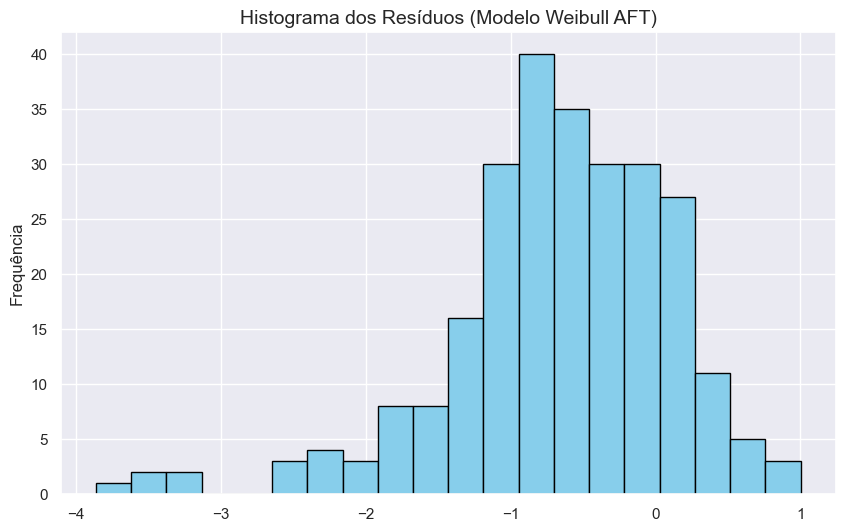

In [174]:
# Resíduos Baseados no Tempo Ajustado
# Resíduos: diferença entre o log do tempo observado e o log do tempo ajustado
dados_regressao['log_time_observado'] = np.log(dados_regressao['n_days'])
dados_regressao['log_time_ajustado'] = np.log(aft_model.predict_median(dados_regressao))
dados_regressao['residuos'] = dados_regressao['log_time_observado'] - dados_regressao['log_time_ajustado']

# Análise Gráfica dos Resíduos

# (a) Histograma dos Resíduos
plt.figure(figsize=(10, 6))
plt.hist(dados_regressao['residuos'], bins=20, color='skyblue', edgecolor='black')
plt.title("Histograma dos Resíduos (Modelo Weibull AFT)", fontsize=14)

plt.ylabel("Frequência", fontsize=12)
plt.grid(True)
plt.show()

#### **Resíduos de Cox-Snell**

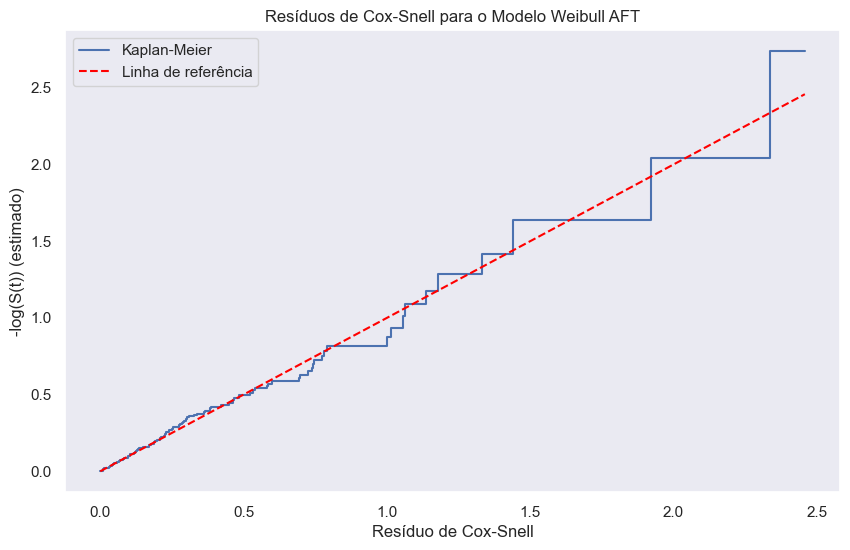

In [178]:
# (b) Calculando os resíduos de Cox-Snell
# A função de sobrevivência acumulada para Weibull é calculada como S(t) = exp(-lambda * t^rho)
# Onde lambda e rho são parâmetros estimados do modelo

# Calcular a função de risco cumulativo predita para cada indivíduo no tempo observado
dados_regressao['cox_snell_residuals'] = [
    aft_model.predict_cumulative_hazard(dados_regressao.iloc[[i]]).loc[dados_regressao['n_days'].iloc[i]].values[0]
    for i in range(len(dados_regressao))
]

# Ajustar um estimador Kaplan-Meier aos resíduos
kmf.fit(dados_regressao['cox_snell_residuals'], event_observed=dados_regressao['dead'])

# Plotar os resíduos de Cox-Snell
plt.figure(figsize=(10, 6))
plt.step(kmf.survival_function_.index, -np.log(kmf.survival_function_['KM_estimate']), where="post", label="Kaplan-Meier")
plt.plot([0, max(dados_regressao['cox_snell_residuals'])], [0, max(dados_regressao['cox_snell_residuals'])], linestyle='--', color='red', label="Linha de referência")
plt.title("Resíduos de Cox-Snell para o Modelo Weibull AFT")
plt.xlabel('Resíduo de Cox-Snell')
plt.ylabel("-log(S(t)) (estimado)")
plt.legend()
plt.grid()
plt.show()

#### **Resíduos versus Previsões**

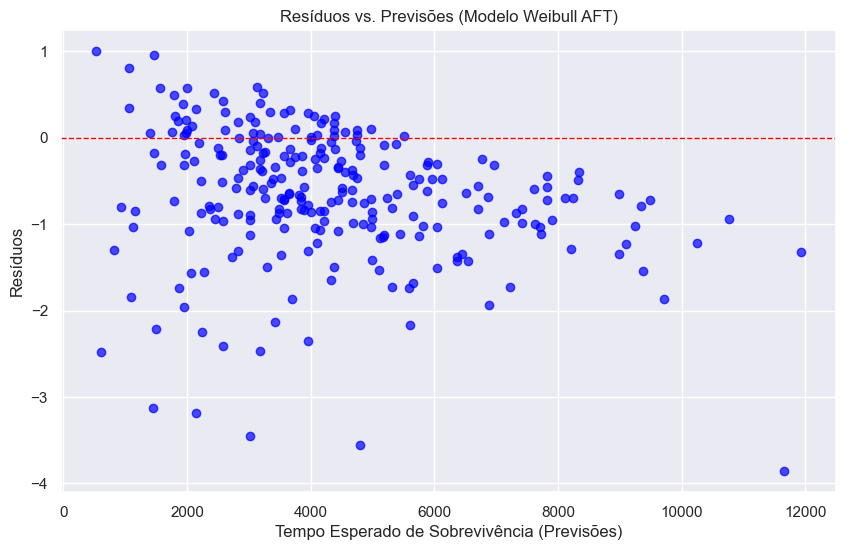

In [179]:
previsoes = aft_model.predict_expectation(dados_regressao)

plt.figure(figsize=(10,6))
plt.scatter(previsoes, dados_regressao.residuos, alpha=0.7, color='blue')
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title('Resíduos vs. Previsões (Modelo Weibull AFT)')
plt.xlabel('Tempo Esperado de Sobrevivência (Previsões)')
plt.ylabel('Resíduos')
plt.show()

#### **QQ-plot dos resíduos**

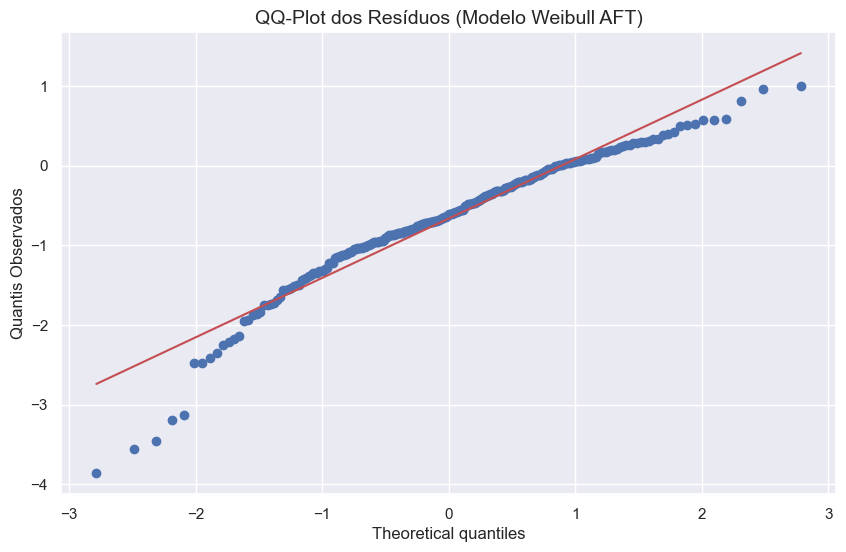

In [177]:
# (d) QQ-Plot dos Resíduos
import scipy.stats as stats

plt.figure(figsize=(10, 6))
stats.probplot(dados_regressao['residuos'], dist="norm", plot=plt)
plt.title("QQ-Plot dos Resíduos (Modelo Weibull AFT)", fontsize=14)
plt.ylabel("Quantis Observados", fontsize=12)
plt.show()

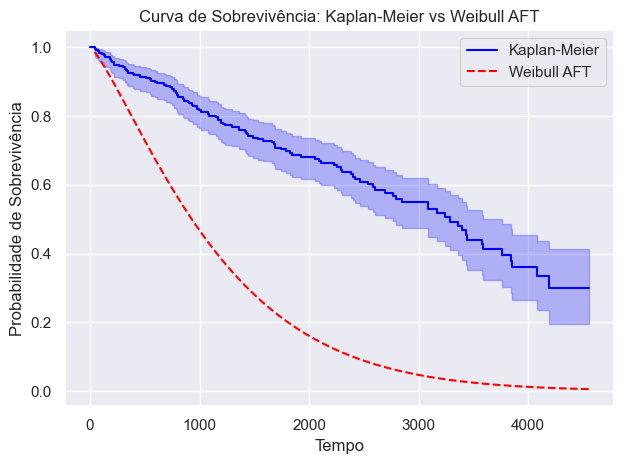

In [194]:
kmf.fit(dataset_tratado.n_days, event_observed=dataset_tratado.dead, label='Kaplan-Meier')
kmf.plot_survival_function(ci_show=True, ax=plt.gca(), color='blue')

survival_curve = aft_model.predict_survival_function(dataset_tratado.iloc[0:1], times=dataset_tratado.n_days.sort_values().unique())
plt.plot(dataset_tratado.n_days.sort_values().unique(), survival_curve.values.flatten(), label='Weibull AFT', color='red', linestyle='--')

plt.title('Curva de Sobrevivência: Kaplan-Meier vs Weibull AFT')
plt.xlabel('Tempo')
plt.ylabel('Probabilidade de Sobrevivência')
plt.legend()
plt.tight_layout()
plt.show()